# Dataset Analysis

## Library Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read Data
df = pd.read_csv(f'C:/University/Junior/Medical Monitors/Tasks/Final Task/data/raw/data.csv')
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175724,I75,VEB,205,254,0.167375,0.998450,-1.884460,-2.278752,-1.884460,3,...,-0.063313,31,8,44,5,-0.063313,0.026827,0.679694,1.798788,1.291884
175725,I75,N,254,231,0.067664,0.986674,-0.321804,-0.321804,-0.743924,2,...,-0.038867,5,3,24,16,-0.038867,-0.370870,-0.697097,-0.948059,-1.078708
175726,I75,N,231,229,-0.129754,0.746366,-0.303551,-0.303551,-0.875649,3,...,-0.113876,4,4,24,16,-0.113876,-0.113876,-0.452218,-0.738737,-0.917931
175727,I75,N,229,232,-0.133953,0.747789,-0.626746,-0.626746,-0.871080,2,...,0.087784,18,8,42,16,0.087784,0.107684,0.308452,0.572327,-0.093598


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175729 entries, 0 to 175728
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          175729 non-null  object 
 1   type            175729 non-null  object 
 2   0_pre-RR        175729 non-null  int64  
 3   0_post-RR       175729 non-null  int64  
 4   0_pPeak         175729 non-null  float64
 5   0_tPeak         175729 non-null  float64
 6   0_rPeak         175729 non-null  float64
 7   0_sPeak         175729 non-null  float64
 8   0_qPeak         175729 non-null  float64
 9   0_qrs_interval  175729 non-null  int64  
 10  0_pq_interval   175729 non-null  int64  
 11  0_qt_interval   175729 non-null  int64  
 12  0_st_interval   175729 non-null  int64  
 13  0_qrs_morph0    175729 non-null  float64
 14  0_qrs_morph1    175729 non-null  float64
 15  0_qrs_morph2    175729 non-null  float64
 16  0_qrs_morph3    175729 non-null  float64
 17  0_qrs_morp

In [4]:
print("Dataset shape: ", df.shape)

Dataset shape:  (175729, 34)


In [5]:
df.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,...,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000,175729.000000
mean,197.180095,197.197452,0.039047,0.117722,0.856690,-0.586759,-0.174214,17.617155,8.713809,37.457893,...,-0.216058,10.594671,7.107404,28.047101,10.345026,-0.216058,-0.247793,-0.318711,-0.386660,-0.539609
std,61.704376,61.721591,0.192159,0.636959,0.866908,0.799548,0.368802,10.619784,7.890367,23.635872,...,0.283534,9.915027,7.654618,14.833354,4.831224,0.283534,0.310575,0.408330,0.494992,0.488869
min,49.000000,71.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,3.000000,...,-6.461754,0.000000,1.000000,4.000000,1.000000,-6.461754,-4.913302,-3.987959,-2.961392,-3.132136
25%,153.000000,153.000000,-0.068575,-0.238145,0.329792,-0.910381,-0.176258,14.000000,4.000000,25.000000,...,-0.324056,4.000000,3.000000,18.000000,8.000000,-0.324056,-0.368213,-0.536836,-0.679042,-0.813284
50%,188.000000,188.000000,-0.000857,-0.039699,0.905516,-0.634711,-0.105488,17.000000,6.000000,30.000000,...,-0.124670,5.000000,5.000000,24.000000,9.000000,-0.124670,-0.185466,-0.339986,-0.477611,-0.592158
75%,235.000000,235.000000,0.108743,0.223369,1.428608,-0.350441,-0.054578,22.000000,12.000000,44.000000,...,-0.020726,15.000000,8.000000,33.000000,12.000000,-0.020726,-0.013214,0.026373,0.057486,-0.172165
max,506.000000,506.000000,10.565904,4.633166,4.598265,3.894399,3.129033,131.000000,113.000000,247.000000,...,1.380211,128.000000,121.000000,290.000000,86.000000,1.380211,2.784179,4.040094,2.771395,2.764891


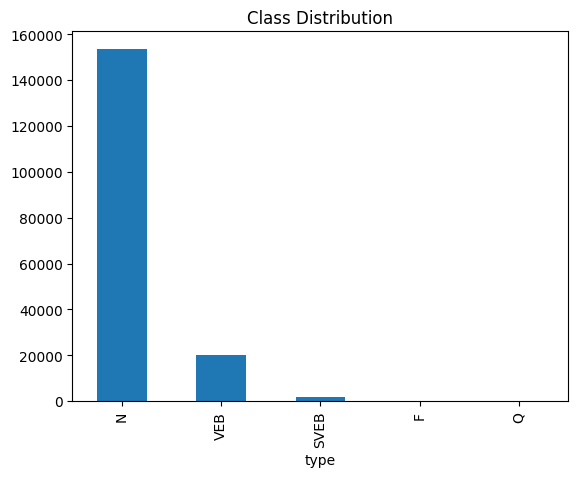

In [6]:
df['type'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Data Preprocessing

In [7]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [8]:
print("Label mapping:")
for label, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded_label}")

Label mapping:
F: 0
N: 1
Q: 2
SVEB: 3
VEB: 4


In [9]:
X = df.drop('type', axis=1)
y = df['type']    

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

## Data Augmentation

In [11]:
for col in X_train.select_dtypes(include='object').columns:
    if (X_train[col].apply(lambda x: isinstance(x, str) and not x.isdigit())).any():
        print(f"Column '{col}' contains non-numeric strings.")
        # You can further inspect values in this column
        print(X_train[col].unique())

Column 'record' contains non-numeric strings.
['I27' 'I62' 'I03' 'I34' 'I38' 'I52' 'I55' 'I43' 'I20' 'I49' 'I37' 'I02'
 'I58' 'I23' 'I50' 'I10' 'I67' 'I04' 'I48' 'I12' 'I31' 'I54' 'I51' 'I42'
 'I07' 'I65' 'I30' 'I08' 'I66' 'I19' 'I63' 'I71' 'I18' 'I53' 'I75' 'I13'
 'I29' 'I24' 'I68' 'I59' 'I61' 'I64' 'I32' 'I44' 'I60' 'I70' 'I36' 'I45'
 'I39' 'I15' 'I01' 'I57' 'I74' 'I05' 'I26' 'I22' 'I06' 'I72' 'I17' 'I41'
 'I35' 'I69' 'I73' 'I21' 'I47' 'I14' 'I25' 'I46' 'I28' 'I33' 'I09' 'I40'
 'I56' 'I11' 'I16']


In [12]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Check the class distribution in the training set
print("Class distribution in training set:")
print(y_train.value_counts())

# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['record'], drop_first=True)

# Use ADASYN with fewer neighbors
adasyn = ADASYN(random_state=42, n_neighbors=3)  # Reduced from default 5
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_encoded, y_train)

# Check the new class distribution after resampling
print("\nClass distribution after ADASYN:")
print(y_train_resampled.value_counts())

Class distribution in training set:
type
1    107482
4     14000
3      1371
0       153
2         4
Name: count, dtype: int64

Class distribution after ADASYN:
type
2    107484
1    107482
3    107467
0    107448
4    107205
Name: count, dtype: int64


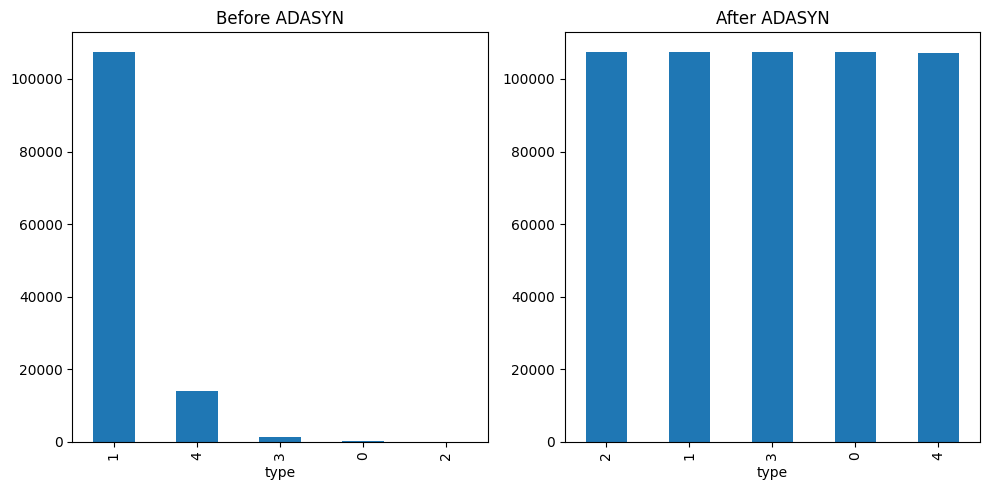

In [13]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar', title='Before ADASYN')
plt.subplot(1,2,2)
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='After ADASYN')
plt.tight_layout()
plt.show()

# Model Creation

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# First, encode the validation data the same way as training data
X_val_encoded = pd.get_dummies(X_val, columns=['record'], drop_first=True)

# Make sure X_val_encoded has the same columns as X_train_encoded
missing_cols = set(X_train_encoded.columns) - set(X_val_encoded.columns)
for col in missing_cols:
    X_val_encoded[col] = 0
X_val_encoded = X_val_encoded[X_train_encoded.columns]

# Train the model on the encoded data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)  # Use resampled data

# Predict using encoded validation data
y_pred_xgb = xgb_model.predict(X_val_encoded)

print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb, target_names=label_encoder.classes_.tolist()))

XGBoost Classification Report:
              precision    recall  f1-score   support

           F       0.65      0.61      0.62        33
           N       1.00      1.00      1.00     23032
           Q       0.00      0.00      0.00         1
        SVEB       0.91      0.95      0.93       293
         VEB       0.99      1.00      1.00      3000

    accuracy                           1.00     26359
   macro avg       0.71      0.71      0.71     26359
weighted avg       1.00      1.00      1.00     26359



c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<Figure size 800x600 with 0 Axes>

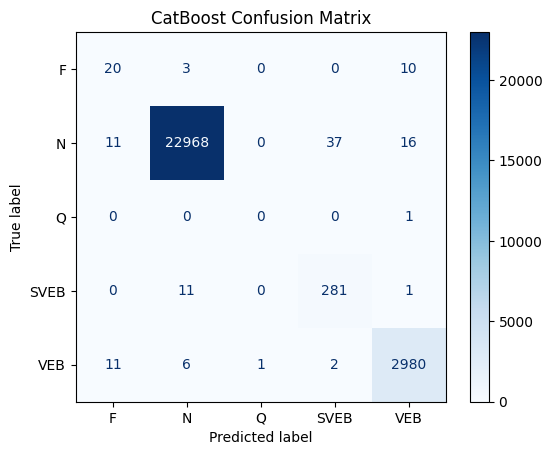

In [ ]:
# CatBoost Model
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Train CatBoost model
catboost_model = CatBoostClassifier(
    random_seed=42,
    verbose=0,
    loss_function='MultiClass'
)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Predict using encoded validation data
y_pred_catboost = catboost_model.predict(X_val_encoded)

print("\nCatBoost Classification Report:")
print(classification_report(y_val, y_pred_catboost, target_names=label_encoder.classes_.tolist()))

Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_catboost)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.show()


LightGBM Classification Report:
              precision    recall  f1-score   support

           F       0.60      0.55      0.57        33
           N       1.00      1.00      1.00     23032
           Q       0.00      0.00      0.00         1
        SVEB       0.91      0.95      0.93       293
         VEB       0.99      1.00      0.99      3000

    accuracy                           1.00     26359
   macro avg       0.70      0.70      0.70     26359
weighted avg       1.00      1.00      1.00     26359



c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\University\Junior\Medical Monitors\Tasks\Final Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<Figure size 800x600 with 0 Axes>

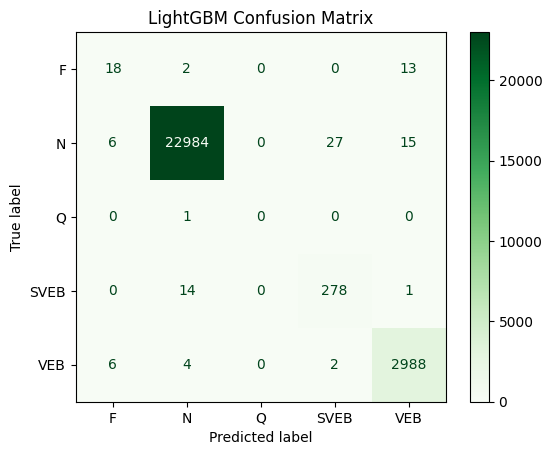

In [18]:
# LightGBM Model
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Train LightGBM model
lgbm_model = LGBMClassifier(
    random_state=42,
    verbose=-1,
    objective='multiclass',
    metric='multi_logloss'
)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Predict using encoded validation data
y_pred_lgbm = lgbm_model.predict(X_val_encoded)

print("\nLightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgbm, target_names=label_encoder.classes_.tolist()))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_lgbm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap='Greens')
plt.title('LightGBM Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_val_encoded)

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_val, y_pred_knn, target_names=label_encoder.classes_))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           F       0.12      0.39      0.18        33
           N       1.00      0.98      0.99     23032
           Q       0.25      1.00      0.40         1
        SVEB       0.58      0.89      0.70       293
         VEB       0.94      0.96      0.95      3000

    accuracy                           0.98     26359
   macro avg       0.58      0.85      0.65     26359
weighted avg       0.99      0.98      0.98     26359



In [20]:
# Saving accuracies of each model in a txt file
with open('model_accuracies.txt', 'w') as f:
    f.write("XGBoost Accuracy: " + str(xgb_model.score(X_val_encoded, y_val)) + "\n")
    f.write("CatBoost Accuracy: " + str(catboost_model.score(X_val_encoded, y_val)) + "\n")
    f.write("LightGBM Accuracy: " + str(lgbm_model.score(X_val_encoded, y_val)) + "\n")
    f.write("KNN Accuracy: " + str(knn_model.score(X_val_encoded, y_val)) + "\n")